# Midterm Project : M.A.F.I.A. in the morning
* * *

## 해 보실 일들
* 아래 “해야 할 일들”은 꼭 이 일들만 하라는 뜻이 아닙니다. 이외에도 주어진 문제를 다양하게 분석하고 실험해 보세요.

* 이 프로젝트는 마피아를 확률 시뮬레이션으로 실험해보는 프로젝트입니다.
    * 프로젝트는 코드의 구현보다는 "실험"을 해보시고, 시뮬레이션 데이터를 통해 확률을 더 잘 이해해보자는 취지입니다
    * 그래서 당연히 정해진 정답이 없습니다.
    * 틀려도 됩니다. 노력에는 보상이 따를 것입니다.
    * 제출하실 때 코드와 함께 짧은 (A4용지 2~3장 내외) 보고서를 같이 내 주세요.
    * 더 길게 내셔도 됩니다. 다만 같은 내용을 반복한다든지 하는 방법은 피해주세요.

In [71]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import random

## 1. 가장 단순한 마피아 게임
* 일단 시민과 마피아 딱 두 종류의 집단만 있다고 생각해 봅시다.
* 아래의 상황을 시뮬레이션으로 만들어 보세요.
* 하루는 낮과 밤으로 이루어져 있습니다. 
    * 게임은 낮을 먼저, 밤을 나중에 합니다: 1일차 낮 → 1일차 밤 → 2일차 낮 → 2일차 밤 → ... 
    * 낮에는 모든 사람이 무작위적으로 한 사람을 죽입니다. 마피아는 서로를 알고 있지만, 사람을 죽이는 것은 무작위적이라고 생각하시면 됩니다.
    * 밤에는 마피아가 시민 중에 한 명을 죽입니다. 
* 처음에 주어진 마피아와 시민의 수에 따라서 시민과 마피아의 승률은 어떻게 될까요? 여러번 시뮬레이션을 해 보시면서 주어진 조건에 대해 평균 승률을 구해 보세요. 
* 혹시 시민과 마피아의 수에 대해서 어떤 패턴이 보이시나요? 보인다면 그 이유는 무엇일까요?
    * 잘 보이지 않는다면 한 변수를 고정하고 다른 변수를 하나씩 증가하면서 관측을 여러번 해 보세요

* 기본적인 Function을 먼저 정의

    - in_Game()          : 게임을 진행. 시민의 승패여부를 리턴
    - citizen_win_Rate() : 시민이 이길 확률을 계산하고 리턴
    - in_Night()         : 밤이 되었을 때, 활동 정의. 수행 후 날짜와 시민 수를 리턴값으로 업데이트
    - in_Morning()       : 낮이 되었을 때, 활동 정의. 수행 후 시민과 마피아  리턴값으로 업데이트
    - Mafia_Game1()      : 마피아와 시민의 비율을 변경하며 각 확률을 저장한 리스트를 리턴

In [72]:
def in_Morning(mafia, citizen):
    participant=mafia+citizen
    kill = random.randrange(1, participant+1)
    if (kill-mafia) > 0:
        citizen -= 1
    else:                   
        mafia -= 1
    return mafia, citizen

def in_Night(day, citizen):
    citizen -= 1
    day += 1
    return day, citizen

def in_Game(mafia, citizen, morning, day):
    win = True
    while (mafia > 0) & (citizen > mafia):
        participant = mafia + citizen
        if morning == True:
            mafia,citizen = in_Morning(mafia, citizen)
            morning = False
        else:
            day, citizen = in_Night(day, citizen)
            morning = True
        #print(f"Day{day}{morning}\t Mafia : {mafia} Citizen : {citizen}")
    if mafia > 0:
        win = False
    return win

- in_Game()내의 print문을 주석해제 하여 정상작동함을 확인 할 수 있다

In [73]:
mafia=2 
citizen=5
morning=True
day=1
if in_Game(mafia, citizen, morning, day)==True:
    print("Citizen Win!")
else:
    print("Mafia Win!")

Mafia Win!


- citizen_win_Rate() : 같은조건의 게임을 반복하여 확률을 반환 
- Mafia_Game_Basic() : 마피아/게임인원의 비율을 변경하며 각 확률을 저장하는 리스트를 반환

In [74]:
def citizen_win_Rate(mafia, citizen, times):
    wincount = 0
    for i in range (0, times):
        if in_Game(mafia, citizen, morning, day)==True:
            wincount += 1
    return 100*wincount / times

def Mafia_Game_Basic(mafia, citizen):
    citizen_win_list = list()
    while(mafia<citizen):
        times = 100
        rate = citizen_win_Rate(mafia, citizen, times)
        citizen_win_list.append(rate)
        mafia +=1
        citizen -= 1
    return citizen_win_list

## 실험 방법

- 시민의 수가 마피아의 수 이하일 경우 마피아의 승
- 또한 마피아의 수가 0명이 될 경우 시민의 승
- 코드에서 시민의 수는 고정, 마피아의 수를 늘려가며 시민의 승률을 계산함
- 시민의 수(number_of_citizen)를 변경하며 그에 따른 승률도 추가로 확인 해볼 수 있음
- 각 게임은 동일 조건 하에 times_game번 실행, 평균적인 승률을 조건마다 반영
- kill이 일어 날 때 :
    - kill이 마피아의 수 이하일 때에는 마피아 사망, 그렇지 않을 경우 시민 사망
    - 마피아가 세 명일 때 참가자의 번호를 아래와 같이 설정한다
    
|마피아|마피아|마피아|시민|...|시민|
|-|-|-|-|-|-|
|1|2|3|4|...|n-1|

## 낮 투표 : 난수가 마피아 명 수 이하일 떄 마피아가, 클 때는 시민이 죽음
- day = "morning" 일 때, 난수를 갖는 kill의 값에 따라 랜덤하게 한 명이 죽음
    - 난수가 7, 마피아가 5 명(kill > num_mafia) : 시민이 죽음
    - 난수가 3, 마피아가 5 명(kill <= num_mafia) : 마피아가 죽음

## 마피아 : 밤에 시민 중 한명을 죽임
- day = "night" 일 떄, 시민 수가 -1 되도록 함

## Data Frame
-  game_list : 마피아 수
- citizens_win_list : 시민의 우승 횟수 / 전체 게임 횟수(%)

In [316]:
mafia=0
citizen=100
morning=True
day=1
times=100

col=["Citizens to Win(%)"]
max = len(Mafia_Game_Basic(mafia, citizen))
index = list()
for i in range(0, max):
    index.append(i)

df=pd.DataFrame(Mafia_Game_Basic(mafia, citizen), index, columns=col)
df

,Citizens to Win(%)
0,100.0
1,80.0
2,74.0
3,52.0
4,43.0
5,38.0
6,29.0
7,36.0
8,21.0
9,16.0


## Histogram

- x축 : 시민의 우승 횟수 / 전체 게임 횟수(%)
- y축 : 마피아 수

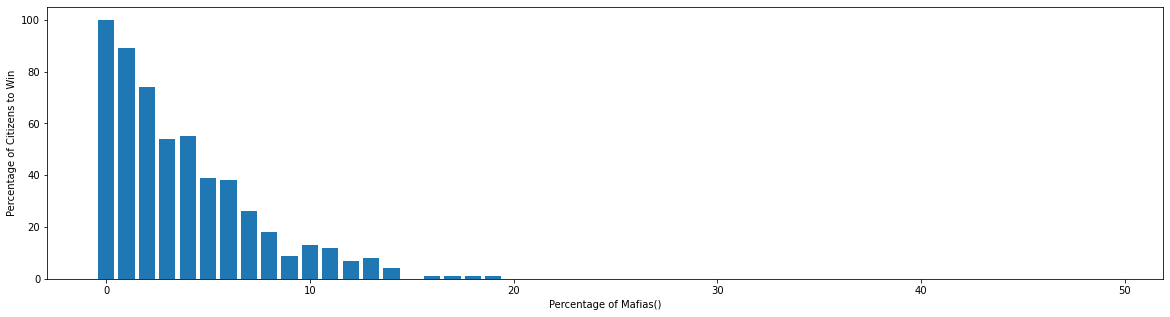

In [76]:
plt.figure(figsize=(20,5))
plt.bar(index, Mafia_Game_Basic(mafia, citizen))
plt.xlabel(f"Percentage of Mafias()")
plt.ylabel("Percentage of Citizens to Win")
plt.show()
plt.close()

## 1-1. 게임을 진행하는 인원수가 많아져도 이 그래프가 유효할지에 대한 실험

- 시민의 수가 각각 10, 50, 100명일 때의 우승확률을 계산해본다
- 위에서는 x축 값을 마피아 수로 설정했지만 아래에선 게임 인원이 다르기 때문에 마피아/시민수의 비율로 설정한다

In [317]:
number_of_mafia=0
number_of_citizen=10
citizen_win_list=list()

max = len(Mafia_Game_Basic(mafia, citizen))
index = list()
for i in range(0, max):
    index.append(i)

key1 = index
value1 = Mafia_Game_Basic(mafia, citizen)

number_of_mafia=0
number_of_citizen=50

key2 = index
value2 = Mafia_Game_Basic(mafia, citizen)

number_of_mafia=0
number_of_citizen=1000

key3 = index
value3 = Mafia_Game_Basic(mafia, citizen)

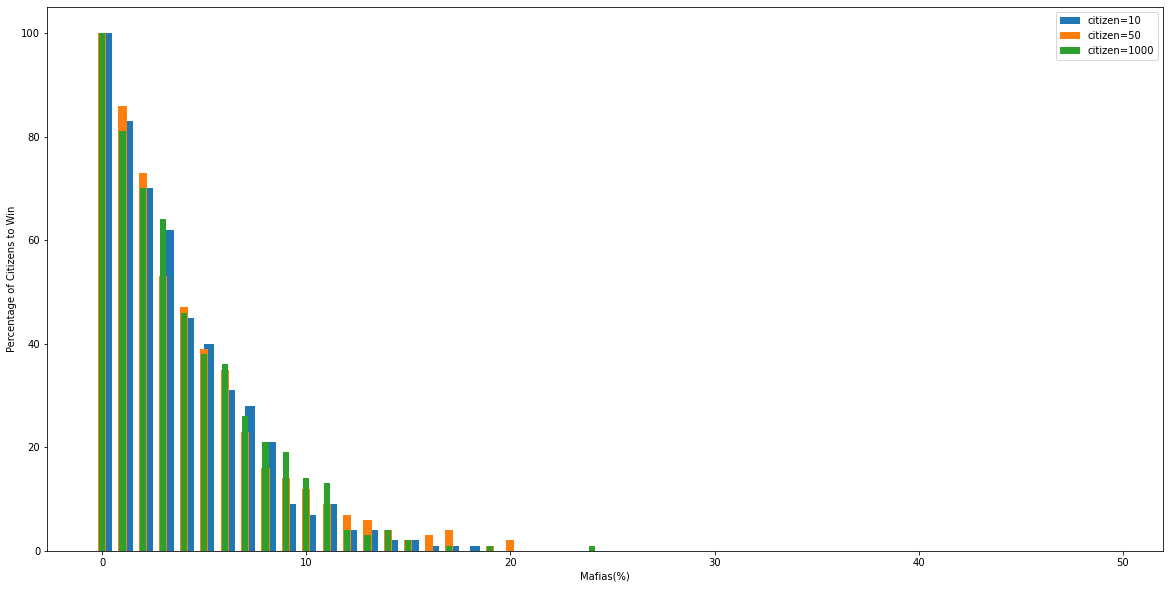

In [318]:
plt.figure(figsize=(20,10))
plt.bar(key1, value1, width=0.5,align="edge", label="citizen=10")
plt.bar(key2, value2, width=0.4,align="center", label="citizen=50")
plt.bar(key3, value3, width=0.3, label="citizen=1000")
plt.legend()
plt.xlabel(f"Mafias(%)")
plt.ylabel("Percentage of Citizens to Win")
plt.show()
plt.close()

## 2. 경찰은 마피아를 찾습니다
* 가장 단순한 게임에 경찰이 들어옵니다.
    * 경찰은 매일 시작 전에 사람을 지목해서 마피아인지 확인할 수 있습니다.
        * 마피아를 지목할수도, 시민을 지목할 수도 있지요
    * 경찰이 마피아를 확인한다면 마피아가 발각될 확률을 약간 올려준다고 생각해 봅시다. 
        * 이 확률도 parameter로 쓸 수 있겠죠?
    * 경찰의 기억력은 형편 없어서 그날 확인한 사람은 당일만 알고 있는 경우도 생각해보고
    * 경찰이 기억력이 좋아서 그날 확인한 사람을 계속 알고 있는 경우도 생각해볼 수 있겠죠
* 이 경우 확률은 어떻게 변화할까요? 어떤 패턴이 있을까요?
    * 참고로 경찰은 시민의 일종입니다. 마피아가 밤에 죽일 수도 있습니다.

In [79]:
def in_Morning_with_Police(mafia, citizen, police, arrest_success):
    participant = mafia + citizen + police
    kill = random.randrange(1, participant+1)-arrest_success
    if kill-mafia > 0:
        citizen -= 1
    elif kill == participant:
        police -= 1
    else:
        mafia -= 1
        arrest_success=0
    return mafia, citizen, police, arrest_success

def in_Night_with_Police(day, mafia, citizen, police, arrest_success):
    citizen -= 1
    day += 1
    participant = mafia + citizen + police
    arrest = random.randrange(1, participant)
    if arrest <= mafia:
        arrest_success += 1
        print(arrest_success)
    return (day, mafia, citizen, police, arrest_success)

def in_Game_with_Police(mafia, citizen, police, morning, day, arrest_success):
    win = True
    while (mafia > 0) & (citizen+police > mafia):
        if morning == True:
            mafia, citizen, police, arrest_success = in_Morning_with_Police(mafia, citizen, police, arrest_success)
            morning = False
        else:
            day, mafia, citizen, police, arrest_success = in_Night_with_Police(day, mafia, citizen, police, arrest_success)
            morning = True
        print(f"m : {mafia} c : {citizen} p : {police}")
    if mafia > 0:
        win = False
    return win

def citizen_win_Rate_with_Police(mafia, citizen, police, times):
    wincount = 0
    for i in range (0, times):
        if in_Game_with_Police(mafia, citizen, police, morning, day, arrest_success)==True:
            wincount += 1
        rate=100 * wincount / times
    return rate

def Mafia_Game_with_Police(mafia, citizen, police):
    if police == 0:
        Mafia_Game_Basic(mafia, citizen)
    citizen_win_list = list()
    participant = mafia + citizen + police
    while(mafia < participant - mafia):
        times = 100
        rate = citizen_win_Rate_with_Police(mafia, citizen, police, times)
        citizen_win_list.append(rate)
        mafia += 1
        citizen -= 1
    return citizen_win_list

In [80]:
mafia=2
citizen=10
police=1
morning=True
day=1
arrest_success=0
print(f"Day{day}{morning}\t Mafia : {mafia} Citizen : {citizen}")
if in_Game_with_Police(mafia, citizen, police, morning, day, arrest_success)==True:
    print("Citizen Win!")
else:
    print("Mafia Win!")

Day1True	 Mafia : 2 Citizen : 10
m : 2 c : 9 p : 1
m : 2 c : 8 p : 1
m : 2 c : 7 p : 1
m : 2 c : 6 p : 1
m : 1 c : 6 p : 1
1
m : 1 c : 5 p : 1
m : 1 c : 4 p : 1
m : 1 c : 3 p : 1
m : 1 c : 2 p : 1
2
m : 1 c : 1 p : 1
m : 0 c : 1 p : 1
Citizen Win!


In [81]:
mafia=3
citizen=10
police=1
# 게임인원 초기화
def job_Init(num, job, list):
    for i in range(0, num):
        list.append(job)

Game_participants=list()
job_Init(mafia, "mafia", Game_participants)
job_Init(citizen, "citizen", Game_participants)
job_Init(police, "police", Game_participants)

In [82]:
# 투표
def day_Vote(flist):
    p_len = len(flist)
    vote_list=list()
    for i in range(0, p_len):
        if flist[i]=="mafia":
            begin=flist.index("citizen")
            vote=random.randrange(begin, p_len)
            vote_list.append(vote)
        else:
            vote=random.randrange(0, p_len)
            vote_list.append(vote)
    print(vote_list)
print(Game_participants)
day_Vote(Game_participants)

['mafia', 'mafia', 'mafia', 'citizen', 'citizen', 'citizen', 'citizen', 'citizen', 'citizen', 'citizen', 'citizen', 'citizen', 'citizen', 'police']
[13, 13, 5, 7, 6, 11, 7, 2, 3, 9, 10, 4, 6, 1]


In [83]:
def in_Game_with_Police(Game_participants):
    win = True
    while (mafia > 0) & (citizen+police > mafia):
        if morning == True:
            kill = random.randrange(0, len(Game_participants))
            Game_participants[kill]

            morning = False
        else:
            day, mafia, citizen, police, arrest_success = in_Night_with_Police(day, mafia, citizen, police, arrest_success)
            morning = True
        print(f"m : {mafia} c : {citizen} p : {police}")
    if mafia > 0:
        win = False
    return win

## Data Frame
-  game_list : 마피아 수
- citizens_win_list : 시민의 우승 횟수 / 전체 게임 횟수(%)

In [84]:
mafia=0
citizen=30
morning=True
day=1
times=100

col=["Citizens to Win(%)"]
max = len(Mafia_Game_with_Police(mafia, citizen, police))
index = list()
for i in range(0, max):
    index.append(i)

df=pd.DataFrame(Mafia_Game_with_Police(mafia, citizen, police), index, columns=col)
df

TypeError: in_Game_with_Police() takes 1 positional argument but 6 were given

## Histogram

- x축 : 시민의 우승 횟수 / 전체 게임 횟수(%)
- y축 : 마피아 수

m : 1 c : 28 p : 1
m : 1 c : 27 p : 1
m : 1 c : 26 p : 1
m : 1 c : 25 p : 1
m : 1 c : 24 p : 1
m : 1 c : 23 p : 1
m : 1 c : 22 p : 1
m : 1 c : 21 p : 1
m : 1 c : 20 p : 1
m : 1 c : 19 p : 1
m : 1 c : 18 p : 1
m : 1 c : 17 p : 1
m : 1 c : 16 p : 1
m : 1 c : 15 p : 1
m : 1 c : 14 p : 1
m : 1 c : 13 p : 1
m : 1 c : 12 p : 1
m : 1 c : 11 p : 1
m : 1 c : 10 p : 1
m : 1 c : 9 p : 1
m : 1 c : 8 p : 1
m : 1 c : 7 p : 1
m : 1 c : 6 p : 1
m : 1 c : 5 p : 1
m : 1 c : 4 p : 1
m : 1 c : 3 p : 1
m : 0 c : 3 p : 1
m : 1 c : 28 p : 1
m : 1 c : 27 p : 1
m : 1 c : 26 p : 1
m : 1 c : 25 p : 1
m : 1 c : 24 p : 1
m : 1 c : 23 p : 1
m : 1 c : 22 p : 1
m : 1 c : 21 p : 1
m : 1 c : 20 p : 1
m : 1 c : 19 p : 1
m : 1 c : 18 p : 1
m : 1 c : 17 p : 1
m : 1 c : 16 p : 1
m : 1 c : 15 p : 1
m : 1 c : 14 p : 1
1
m : 1 c : 13 p : 1
m : 1 c : 12 p : 1
m : 1 c : 11 p : 1
m : 1 c : 10 p : 1
m : 1 c : 9 p : 1
m : 1 c : 8 p : 1
m : 1 c : 7 p : 1
m : 1 c : 6 p : 1
2
m : 1 c : 5 p : 1
m : 1 c : 4 p : 1
m : 1 c : 3 p : 1
m : 

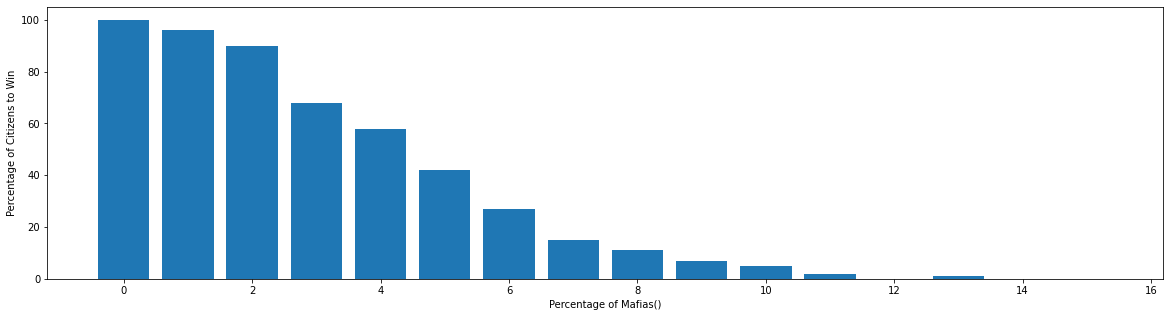

In [ ]:
plt.figure(figsize=(20,5))
plt.bar(index, Mafia_Game_with_Police(mafia, citizen, police))
plt.xlabel(f"Percentage of Mafias()")
plt.ylabel("Percentage of Citizens to Win")
plt.show()
plt.close()

## 3. 메딕은 시민을 살립니다.
* 가장 단순한 게임에 메딕이 들어옵니다
    * 메딕은 매일 밤 한 사람을 골라서 살려줍니다
        * 마피아의 총에 맞은 사람을 지목하면 살리고
        * 아닌 사람을 지목하면 아무 일도 일어나지 않겠죠
* 이 경우 확률은 어떻게 변화할까요? 어떤 패턴이 있을까요?
    * 메딕도 시민입니다. 마피아가 밤에 죽일 수도 있습니다.

In [ ]:
def in_Morning_with_Medic(mafia, citizen):
    participant=mafia+citizen
    kill = random.randrange(1, participant+1)
    if (kill-mafia) > 0:
        citizen -= 1
    else:                   
        mafia -= 1
    return mafia, citizen

def in_Night_with_Medic(day, citizen):
    citizen -= 1
    day += 1
    return day, citizen

def in_Game_with_Medic(mafia, citizen, medic, morning, day):
    win = True
    while (mafia > 0) & (citizen > mafia):
        participant = mafia + citizen
        if morning == True:
            mafia,citizen = in_Morning_with_Medic(mafia, citizen)
            morning = False
        else:
            day, citizen = in_Night_with_Medic(day, citizen)
            morning = True
        #print(f"m : {mafia} c : {citizen}")
    if mafia > 0:
        win = False
    return win

def citizen_win_Rate_with_Medic(mafia, citizen, times):
    wincount = 0
    for i in range (0, times):
        if in_Game_with_Medic(mafia, citizen, morning, day)==True:
            wincount += 1
    return 100*wincount / times

def Mafia_Game1_with_Medic(mafia, citizen, medic):
    citizen_win_list = list()
    while(mafia<citizen):
        times = 100
        rate = citizen_win_Rate_with_Medic(mafia, citizen, times)
        citizen_win_list.append(rate)
        mafia +=1
        citizen -= 1
    return citizen_win_list

In [ ]:
mafia = 0
citizen = 30
medic = 1
morning=True
day=1
times=100

col=["Citizens to Win(%)"]
max = len(Mafia_Game1(mafia, citizen))
index = list()
for i in range(0, max):
    index.append(i)

df=pd.DataFrame(Mafia_Game1(mafia, citizen), index, columns=col)
df

NameError: name 'Mafia_Game1' is not defined

## 4. 경찰은 마피아를 찾고, 메딕은 시민을 살립니다.
* 경찰도 메딕도 있는 게임을 생각해 봅시다.
* 게임이 많이 복잡해지죠?

## 제출 방법
* Due Date: 2021년 11월 26일 23시 59분
* LMS (https://myclass.ssu.ac.kr)에 제출합니다.
    * 파일은 STAT2021_PR1_20212021_홍길동.zip 형태로 부탁드립니다
    * 이 형태가 아닌 경우 제대로 제출되지 않을 수 있습니다.
    * 보고서 PDF파일과 소스코드를 압축해서 한 파일로 만들어주세요 (HWP로 내시면 화낼거에요)
    * 제발 간절히 부탁합니다. egg 혹은 alz는 쓰지 말아주세요... (감점할거에요 -_-+)
    * 제대로 전송이 안되면 개별 파일을 따로 올리셔도 됩니다.
    * 구현체는 제대로 작동을 하면 어떤 형태도 좋습니다.
    * 점수의 차이는 주로 해 보신 실험과 보고서에서 있을 것입니다. 재밌는 실험 많이 해보세요. 굿럭!